# PHYS 434 - Lab 1

## Thomas K. Waters

Import Statements:

In [30]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
from scipy.integrate import quad
import pandas as pd
import math

plt.rcParams["figure.figsize"] = (15,10) #Setting future plot sizes

## A Little Statistics

### Generating a normal distribution for visualization

In [31]:
mu = 0
std = 1

data = stats.norm.rvs(loc = 0, scale = 1, size = 100000)

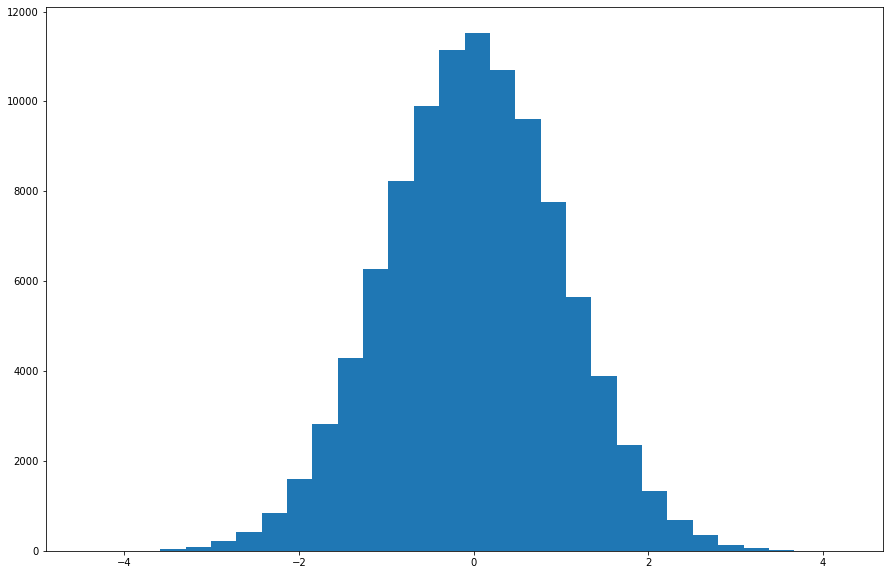

In [32]:
plt.hist(data, bins = 30); # Plots a histogram with 30 bins

### Integrating the normal distribution to find various probabilities

In [33]:
def find_probabilities_norm(x, mu, std):
    
    ''' Calculates probability of drawing values greater than and less than 
        a specified value of x for a given mean (mu) and standard deviation (std)
        and returns the Z score in a normal distribution'''
    
    P_less = scipy.stats.norm.cdf(x, mu, std) #Probability of values LESS than x
    P_greater = scipy.stats.norm.sf(x, mu, std) #Probability of values GREATER than x
    
    Zscore = (x-mu)/std
    
    return P_less, P_greater, Zscore

In [34]:
x = 2.725

std1 = 0.725
std2 = 1.25
std3 = 2
std4 = 4
std5 = 15

In [35]:
P_less1, P_greater1, Z1 = find_probabilities_norm(x, mu, std1)
P_less2, P_greater2, Z2 = find_probabilities_norm(x, mu, std2)
P_less3, P_greater3, Z3 = find_probabilities_norm(x, mu, std3)
P_less4, P_greater4, Z4 = find_probabilities_norm(x, mu, std4)
P_less5, P_greater5, Z5 = find_probabilities_norm(x, mu, std5)

In [36]:
results_df = pd.DataFrame()
results_df['std_dev'] = [std1, std2, std3, std4, std5]
results_df['Prob_less'] = [P_less1, P_less2, P_less3, P_less4, P_less5]
results_df['Prob_greater'] = [P_greater1, P_greater2, P_greater3, P_greater4, P_greater5]

In [37]:
results_df

,std_dev,Prob_less,Prob_greater
0,0.725,0.999915,0.000085
1,1.250,0.985371,0.014629
2,2.000,0.913480,0.086520
3,4.000,0.752143,0.247857
4,15.000,0.572078,0.427922


##### The above values for the probabilities less than the chosen x value and their associated z score agree with the z score table obtained on https://www.ztable.net/

### Determining the standard deviation from probabilities

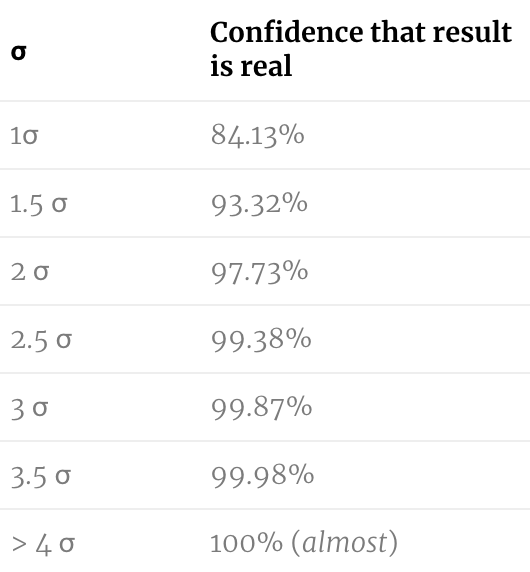

Image from: https://www.zmescience.com/science/what-5-sigma-means-0423423/

In [38]:
standard_sigma1 = stats.norm.ppf(0.8413, mu, std1)
standard_sigma2 = stats.norm.ppf(0.9332, mu, std1)
standard_sigma3 = stats.norm.ppf(0.9773, mu, std1)
standard_sigma4 = stats.norm.ppf(0.9938, mu, std1)
standard_sigma5 = stats.norm.ppf(0.9987, mu, std1)
standard_sigma6 = stats.norm.ppf(0.9998, mu, std1)

In [39]:
standard_sigma1, standard_sigma2, standard_sigma3, standard_sigma4, standard_sigma5, standard_sigma6

(0.7248659428706898,
 1.0875403121878935,
 1.450673806373639,
 1.812900049960561,
 2.183303974912349,
 2.566560754424477)

In [40]:
varried_sigma1 = stats.norm.ppf(P_less1)
varried_sigma2 = stats.norm.ppf(P_less2)
varried_sigma3 = stats.norm.ppf(P_less3)
varried_sigma4 = stats.norm.ppf(P_less4)
varried_sigma5 = stats.norm.ppf(P_less5)

In [41]:
results_df['sigma_norm'] = [varried_sigma1, varried_sigma2, varried_sigma3, varried_sigma4, varried_sigma5]

In [42]:
results_df

,std_dev,Prob_less,Prob_greater,sigma_norm
0,0.725,0.999915,0.000085,3.758621
1,1.250,0.985371,0.014629,2.180000
2,2.000,0.913480,0.086520,1.362500
3,4.000,0.752143,0.247857,0.681250
4,15.000,0.572078,0.427922,0.181667


## Other Continuous Distributions

#### Rayleigh Distribution

#### $f(x;\sigma )={\frac {x}{\sigma ^{2}}}e^{-x^{2}/(2\sigma ^{2})},\quad x\geq 0$

In [43]:
sigma = 1
x = np.arange(0, 4, 0.01)
analytic_rayliegh = []

for i in range(len(x)):
    y = (x[i]/(sigma**2))*math.exp(((-x[i]**2)/(2*sigma**2)))
    analytic_rayliegh.append(y)  

In [44]:
data_rayleigh = stats.rayleigh.rvs(scale = 1, size = 100000)

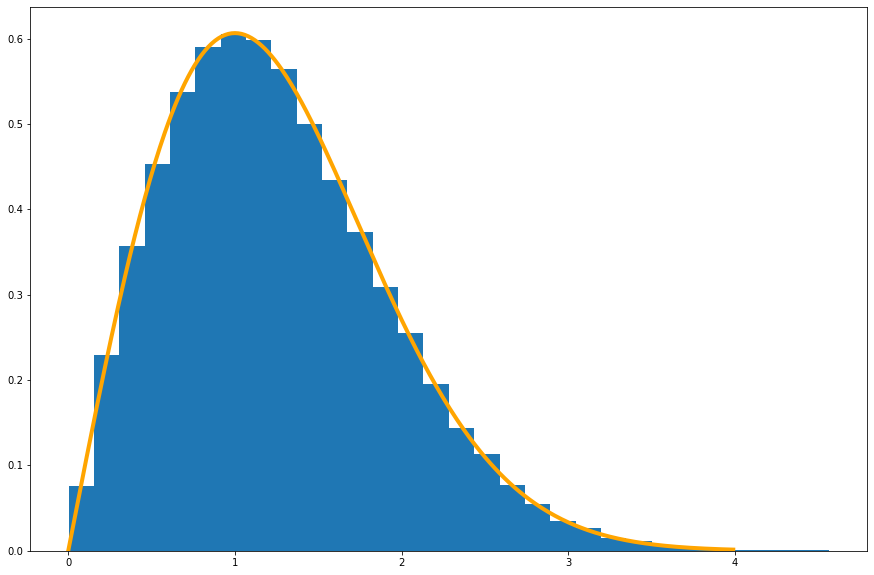

In [45]:
plt.plot(x, analytic_rayliegh, linewidth = 4, color = 'orange')
plt.hist(data_rayleigh, bins = 30, density = True);

#### Hypothetical Measurements

One example of Rayleigh distributions appearing in modern measurement tools is the noise profile of Magnetic Resonance Imaging (MRI) machines (Edelstein et al. and Bernstein et al.). MRI machines use powerful magnetic fields to force protons within a human body to align with the applied magnetic field. The machine then emits pulses of radiation in the radio band at a 90 degree offset from the magnetic field that causes the protons magnetic moment to flip either 90 degrees or 180 degrees with respect to the magnetic field. The MRI is equipped with sensors to detect the photons released by the protons as they move out of equilibrium. Based on the electromagnetic energy released and the time it takes for the impacted protons to return to equilirbuim, physicians can determine what type of tissue that the proton resides in (see below for a link with more information on MRI machines).

Lets assume that we wish to measure a single proton in an MRI machine and that proton emits a photon with an energy of 3.1214 with arbitrary units as it realigns with the applied external magnetic field after the radio pulse is turned off. In the following code, we will determine what the probability of obtaining a measurement of 3.1214 from this proton is a real signal, or the probility that we are measuring photons coming from the proton in the magnetic field and not photons originating from the electronics of the machine. In other words, what is the probability of obtaining a value of exactly 3.1214 or more from ONLY the background radiation eminating from the machine itself?

To determine this probability, we must integrate the probability density function of the Rayleigh Distribution from 3.1214 to infinity, shown below:

#### $\int_{3.1214}^{\infty} {\frac {x}{\sigma ^{2}}}e^{-x^{2}/(2\sigma ^{2})} \,dx$

In [46]:
def find_probabilities_rayleigh(x, scale):
    
    ''' 
    Calculates probability of drawing values greater than
    a specified value of x for a given scale parameter in 
    a Rayleigh Distribution
    '''
    
    P_greater = scipy.stats.rayleigh.sf(x, mu, std) #Probability of values GREATER than x
    
    return P_greater

In [47]:
measurement = 3.1214
scale_param = 1

prob = find_probabilities_rayleigh(measurement, scale_param)

In [48]:
print(f'The probability of measuring a photon with energy 3.1214 (arbitrary units) from solely background radiation in an MRI machine is {prob*100:.2f}%')
print(f'This measurement is an {-stats.norm.ppf(prob):.2f}\u03C3 event.')

The probability of measuring a photon with energy 3.1214 (arbitrary units) from solely background radiation in an MRI machine is 0.77%
This measurement is an 2.42σ event.


Lets try some other measurements!

In [73]:
measurement1 = 1.15
measurement2 = 2
measurement3 = 3.45
measurement4 = 5.21
measurement5 = 6.2

prob1 = find_probabilities_rayleigh(measurement1, scale_param)
prob2 = find_probabilities_rayleigh(measurement2, scale_param)
prob3 = find_probabilities_rayleigh(measurement3, scale_param)
prob4 = find_probabilities_rayleigh(measurement4, scale_param)
prob5 = find_probabilities_rayleigh(measurement5, scale_param)

sigma_ray1 = stats.norm.ppf(prob1)
sigma_ray2 = stats.norm.ppf(prob2)
sigma_ray3 = stats.norm.ppf(prob3)
sigma_ray4 = stats.norm.ppf(prob4)
sigma_ray5 = stats.norm.ppf(prob5)

In [77]:
print(f'The probability of the background producing measurement 1 or greater is {prob1*100:.7f}%.  The sigma value of measurement 1 is  {sigma_ray1:.2f}')
print(f'The probability of the background producing measurement 2 or greater is {prob2*100:.7f}%.  The sigma value of measurement 2 is  {-sigma_ray2:.2f}')
print(f'The probability of the background producing measurement 3 or greater is  {prob3*100:.7f}%.  The sigma value of measurement 3 is  {-sigma_ray3:.2f}')
print(f'The probability of the background producing measurement 4 or greater is  {prob4*100:.7f}%.  The sigma value of measurement 4 is  {-sigma_ray4:.2f}')
print(f'The probability of the background producing measurement 5 or greater is  {prob5*100:.7f}%.  The sigma value of measurement 5 is  {-sigma_ray5:.2f}')

The probability of the background producing measurement 1 or greater is 51.6205674%.  The sigma value of measurement 1 is  0.04
The probability of the background producing measurement 2 or greater is 13.5335283%.  The sigma value of measurement 2 is  1.10
The probability of the background producing measurement 3 or greater is  0.2602585%.  The sigma value of measurement 3 is  2.79
The probability of the background producing measurement 4 or greater is  0.0001276%.  The sigma value of measurement 4 is  4.70
The probability of the background producing measurement 5 or greater is  0.0000004%.  The sigma value of measurement 5 is  5.75


Text(0, 0.5, 'σ')

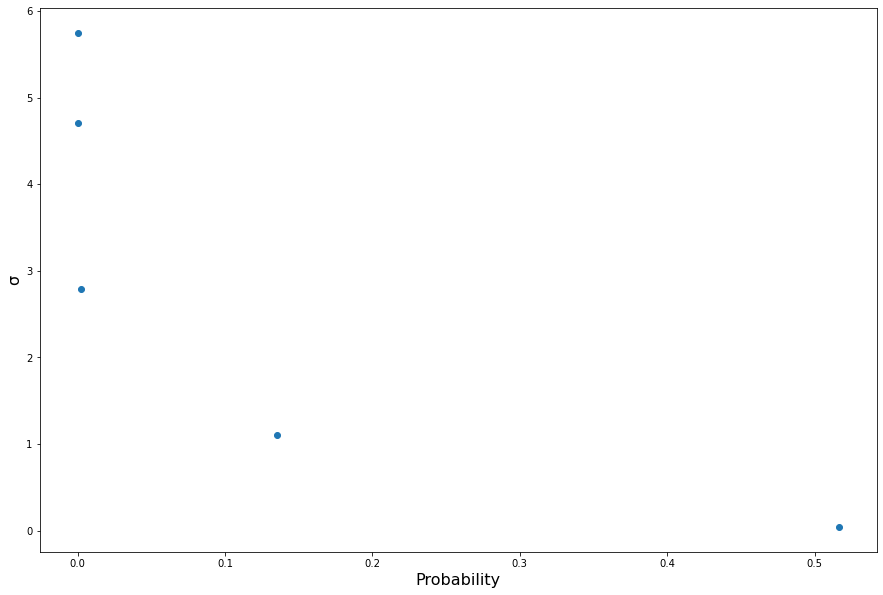

In [86]:
prob_array = [prob1, prob2, prob3, prob4, prob5]
sigma_array = [sigma_ray1, -sigma_ray2, -sigma_ray3, -sigma_ray4, -sigma_ray5]

plt.scatter(prob_array, sigma_array)
plt.xlabel('Probability', size = 16)
plt.ylabel('\u03C3', size = 16);

It appears that $\sigma \propto P^{-1}$!

## Non-continuous Distributions: Poisson

When observing in astronomy the sky contributes a significant amount of photon noise to images taken by ground based telescopes. Due to the quantized nature of photons, the skybackground generates a poisson distribution of noise. Typically, modern astronomers subtract the sky background from their images, but let's assume that we lack that ability. For this experiment, let us assume that the sky background has a Poisson distribution of photon energies in arbitrary units. We want to detect photons coming from an astronomical object emitting photons with an energy near that of the sky background photons. Let's assume that these photons all have and energy of $E = 8$ with arbitrary units. What is the probability of the sky background emitting a photon with an energy of $E=8$ or greater and what $\sigma$ corresponds to that probability?

The Poisson probability mass function is given by: 
#### $\!f(k; \lambda)= \Pr(X{=}k)= \frac{\lambda^k e^{-\lambda}}{k!}, \quad k=0,1,2,3, ...$

where $\lambda$ is the shape parameter and $k$ is the number of occurences.

Firstly, lets visualize this distribution with varying shape parameters.

In [155]:
data_poisson1 = stats.poisson.rvs(mu = 1, loc = 0, size = 100000)
data_poisson2 = stats.poisson.rvs(mu = 2, loc = 0, size = 100000)
data_poisson3 = stats.poisson.rvs(mu = 3, loc = 0, size = 100000)
data_poisson4 = stats.poisson.rvs(mu = 4, loc = 0, size = 100000)

''

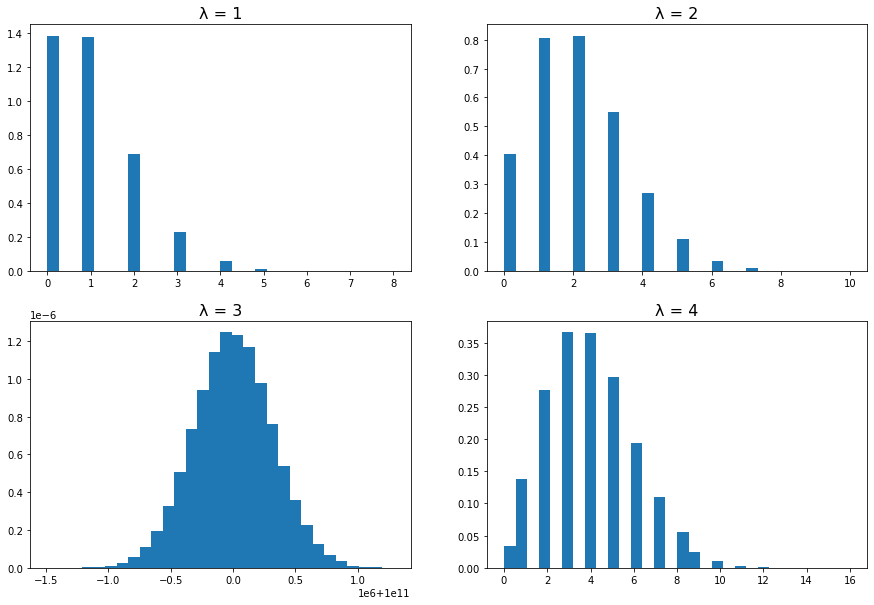

In [154]:
fig, ax = plt.subplots(2,2)

ax[0,0].hist(data_poisson1, bins = 30, density = True)
ax[0,1].hist(data_poisson2, bins = 30, density = True)
ax[1,0].hist(data_poisson3, bins = 30, density = True)
ax[1,1].hist(data_poisson4, bins = 30, density = True)

ax[0,0].set_title('\u03BB = 1', size = 16)
ax[0,1].set_title('\u03BB = 2', size = 16)
ax[1,0].set_title('\u03BB = 3', size = 16)
ax[1,1].set_title('\u03BB = 4', size = 16)
;

I like the way $\lambda = 4$ looks, so lets choose that one.

Now, lets calculate the probility and the $\sigma$ of the sky background producing a photon with energy $E=8$ or greater.

In [116]:
def find_probabilities_poisson(x, scale):    
    ''' 
    Calculates probability of drawing values greater than
    a specified value of x for a given scale parameter in 
    a Poisson Distribution
    '''
    
    P_greater = scipy.stats.poisson.sf(x, scale) #Probability of values GREATER than x
    
    return P_greater

In [147]:
x = 8
scale = 4

prob_poi = find_probabilities_poisson(x, scale)
sigma_poi = stats.norm.ppf(prob_poi)

In [148]:
print(f'The probability of the sky background emitting a photon with energy E=8 or more is {prob_poi*100:.2f}%.')
print(f'The corresponding \u03C3 value for this probability is {-sigma_poi:.2f}\u03C3.')

The probability of the sky background emitting a photon with energy E=8 or more is 2.14%.
The corresponding σ value for this probability is 2.03σ.


As the distributions, probabilities, and sigma values are discrete, the implications on the experiments are that you will also only make discrete measurements. The probability of measuring values between the discrete values are zero. However, the mean value of the distribution can a non-integer value. This is simply a consiquence of taking the average of any set of numbers. The average can be any value. In addition, the values in the probability mass function are not all discrete. Only the number of occurances ($k$) in the equation is discrete. The shape parameter can take on any value greater than or equal to zero.

### References

Edelstein WA, Bottomley PA, Pfeifer LM. A signal-to-noise calibration procedure for NMR imaging systems. Med Phys. 1984 Mar-Apr;11(2):180-5. doi: 10.1118/1.595484. PMID: 6727793.

Bernstein MA, Thomasson DM, Perman WH. Improved detectability in low signal-to-noise ratio magnetic resonance images by means of a phase-corrected real reconstruction. Med Phys. 1989 Sep-Oct;16(5):813-7. doi: 10.1118/1.596304. PMID: 2811764.